In [9]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 10491, done.
remote: Total 10491 (delta 0), reused 0 (delta 0), pack-reused 10491
Receiving objects: 100% (10491/10491), 10.65 MiB | 14.47 MiB/s, done.
Resolving deltas: 100% (7254/7254), done.
/home/ansh.arora/IIITA_Winter21/YOLOv5-CustomDataset/yolov5/yolov5


In [12]:
%cd IIITA_Winter21/YOLOv5-CustomDataset/yolov5/

/home/ansh.arora/IIITA_Winter21/YOLOv5-CustomDataset/yolov5


In [13]:
!pip install -r requirements.txt

In [1]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [2]:
%pwd

'/home/ansh.arora/IIITA_Winter/YOLOv5-CustomDataset'

In [ ]:
# Assuming you're in the data folder
!cat bdd100k/labels/box_track_20/train/0000f77c-6257be58.json

In [7]:
import json
# Function to get the data from JSON Annotation
def extract_info_from_json(json_file):
    json_file = open(json_file)
    data = json.load(json_file)
    
    image_size = [1280,720,3]
    
    annotations = []
    # Parse the JSON Tree
    for idx in range(len(data)):
      # Initialise the info dict 
      info_dict = {}
      info_dict['bboxes'] = []
      
      info_dict['filename'] = data[idx]['name']
      info_dict['image_size'] = tuple(image_size)
      
      for label in data[idx]['labels']:
        bbox={}
        bbox["class"] = label["category"]

        for coord in label['box2d']:
          value = label['box2d'][coord]
          if(coord == 'x1'):
            coord = 'xmin'
          elif(coord == 'x2'):
            coord ='xmax'
          elif(coord == 'y1'):
            coord = 'ymin'
          elif(coord == 'y2'):
            coord = 'ymax'
          bbox[coord] = int(value)

        info_dict['bboxes'].append(bbox)
      annotations.append(info_dict)

    return annotations
    
    

In [ ]:
# print(extract_info_from_json('/content/bdd100k/labels/box_track_20/train/0000f77c-62c2a288.json'))
print(extract_info_from_json('/content/bdd100k/labels/box_track_20/train/00313a01-b53a2998.json'))

In [8]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"pedestrian":0,
                            "rider":1,
                            "car":2,
                            "truck":3,
                            "bus":4,
                            "train":5,
                            "motorcycle":6,
                            "bicycle":7,
                            "traffic light":8,
                            "traffic sign":9,
                            "trailer":10,
                            "other person": 11,
                            "other vehicle":12}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict, type):
    print_buffer = []
    # For each bounding box
    for b in info_dict["bboxes"]:
        # print(b)
        try:
          # # if(b["class"]=='other person'):
          # #   b["class"]='pedestrian'
          # if(b[])
          class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print(b)
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("bdd100k/labels/box_track_20/"+type, info_dict["filename"].replace("jpg", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [ ]:
# Get the annotations
annotations = [os.path.join('bdd100k/labels/box_track_20/train', x) for x in os.listdir('bdd100k/labels/box_track_20/train') if x[-4:] == "json"]
annotations.sort()
print(annotations)


# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_json(ann)
    for i in info_dict:
      convert_to_yolov5(i,'train')   
annotations = [os.path.join('bdd100k/labels/box_track_20/train', x) for x in os.listdir('bdd100k/labels/box_track_20/train') if x[-3:] == "txt"]
print(annotations)

In [16]:
# Get the annotations
annotations = [os.path.join('bdd100k/labels/box_track_20/val', x) for x in os.listdir('bdd100k/labels/box_track_20/val') if x[-4:] == "json"]
annotations.sort()
# print(annotations)


# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_json(ann)
    for i in info_dict:
      convert_to_yolov5(i,'val')   
annotations = [os.path.join('bdd100k/labels/box_track_20/val', x) for x in os.listdir('bdd100k/labels/box_track_20/val') if x[-3:] == "txt"]
print(annotations)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 39.36it/s]

['bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000001.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000002.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000003.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000004.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000005.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000006.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000007.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000008.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000009.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000010.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000011.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000012.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000013.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000014.txt', 'bdd100k/labels/box_track_20/val/b1c66a42-6f7d68ca-0000015.txt', 'bdd100k/labels/box_trac

bdd100k/labels/box_track_20/train/01688cf2-82391195-0000005.txt
01688cf2-82391195
bdd100k/images/track/train/01688cf2-82391195/01688cf2-82391195-0000005.jpg
[[2.00000e+00 7.07840e+02 4.54320e+02 7.28320e+02 4.73040e+02]
 [2.00000e+00 8.32640e+02 4.56480e+02 8.85120e+02 4.88160e+02]
 [1.20000e+01 9.72160e+02 2.63520e+02 1.28064e+03 5.45760e+02]
 [2.00000e+00 8.72960e+02 4.52880e+02 8.96000e+02 4.78800e+02]
 [3.00000e+00 8.17280e+02 4.28040e+02 8.59520e+02 4.69080e+02]
 [2.00000e+00 7.75040e+02 4.55040e+02 7.96800e+02 4.72320e+02]
 [3.00000e+00 7.61600e+02 4.40280e+02 7.84640e+02 4.66920e+02]
 [2.00000e+00 1.28000e+00 4.77360e+02 6.27200e+01 4.93200e+02]]


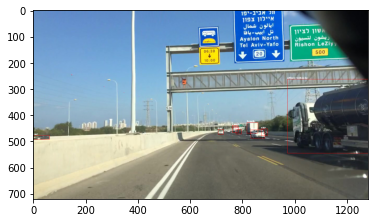

In [15]:
# random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    print(transformed_annotations)

    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)),outline ="red")
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
print(annotation_file)
# annotation_file = "/content/bdd100k/labels/box_track_20/train/0000f77c-62c2a288-0000020.txt"
# print(annotation_file.index("0000f77c-62c2a288-0000020"))
# print(annotation_file.index("-0000020"))
# print(annotation_file.index(".txt"))
file_name = annotation_file[34:51]
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]
    

#Get the corresponding image file
image_file = annotation_file.replace("labels/box_track_20/train", "images/track/train/"+file_name).replace("txt", "jpg")
print(image_file)
# image_file = "/content/bdd100k/images/track/train/0000f77c-62c2a288/0000f77c-62c2a288-0000020.jpg"
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [20]:
%cd /home

/home


In [21]:
%cd ansh.arora/IIITA_Winter/YOLOv5-CustomDataset/

/home/ansh.arora/IIITA_Winter/YOLOv5-CustomDataset


In [2]:
# %cd bdd100k/images/track/train
# !find . -mindepth 2 -type f -print -exec mv {} . \;
!rm -rf bdd100k/images/track/train/*/

In [13]:
# %cd bdd100k/images/track/val
# !find . -mindepth 2 -type f -print -exec mv {} . \;
!rm -rf bdd100k/images/track/val/*/

In [25]:
# %cd /content/bdd100k/images/track/test
# !find . -mindepth 2 -type f -print -exec mv {} . \;
# !rm -rf /content/bdd100k/images/track/test/*/

In [16]:
!mv bdd100k/images/track/* bdd100k/images/track/.. && rm -rf bdd100k/images/track

In [19]:
!mv bdd100k/labels/box_track_20/* bdd100k/labels/box_track_20/.. && rm -rf bdd100k/labels/box_track_20

In [28]:
%cd bdd100k/images/train
!ls | wc -l

[Errno 2] No such file or directory: 'bdd100k/images/train'
/home/ansh.arora/IIITA_Winter/YOLOv5-CustomDataset/bdd100k/images/track/train
279479


In [23]:
!mv bdd100k/labels/val bdd100k/labels/test

In [ ]:
# !rm -rf /content/bdd100k/images/test

In [25]:
!mkdir bdd100k/images/val bdd100k/labels/val

In [28]:
# Read images and annotations
images = [os.path.join('bdd100k/images/train', x) for x in os.listdir('bdd100k/images/train')]
annotations = [os.path.join('bdd100k/labels/train', x) for x in os.listdir('bdd100k/labels/train') if x[-3:] == "txt"]

images.sort()
annotations.sort()
# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
# val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [29]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'bdd100k/images/train_new/')
move_files_to_folder(val_images, 'bdd100k/images/val/')
# move_files_to_folder(test_images, 'images/test/')
# move_files_to_folder(test_annotations, 'annotations/test/')

In [30]:
move_files_to_folder(train_annotations, 'bdd100k/labels/train_new/')
move_files_to_folder(val_annotations, 'bdd100k/labels/val/')

In [ ]:
!mv annotations labels
!cd ../yolov5 

In [ ]:
%pwd

'/content/Road_Sign_Dataset/Road_Sign_Dataset'

In [ ]:
!wget -P data/ https://gist.githubusercontent.com/ayooshkathuria/bcf7e3c929cbad445439c506dba6198d/raw/f437350c0c17c4eaa1e8657a5cb836e65d8aa08a/road_sign_data.yaml

--2021-12-14 08:21:21--  https://gist.githubusercontent.com/ayooshkathuria/bcf7e3c929cbad445439c506dba6198d/raw/f437350c0c17c4eaa1e8657a5cb836e65d8aa08a/road_sign_data.yaml
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220 [text/plain]
Saving to: ‘data/road_sign_data.yaml’

road_sign_data.yaml 100%[===================>]     220  --.-KB/s    in 0s      

2021-12-14 08:21:22 (9.15 MB/s) - ‘data/road_sign_data.yaml’ saved [220/220]



In [14]:
%pwd

'/home/ansh.arora/IIITA_Winter21/YOLOv5-CustomDataset/yolov5'

In [ ]:
!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch.yaml --batch 16 --epochs 5 --data bdd100k.yaml --weights yolov5s.pt --workers 24 --name yolo_road_det

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=bdd100k.yaml, hyp=hyp.scratch.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=24, project=runs/train, name=yolo_road_det, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (121/121), done.
remote: Total 174 (delta 120), reused 120 (delta 120), pack-reused 53
Receiving objects: 100% (174/174), 129.54 KiB | 574.00 KiB/s, done.
Resolving deltas: 100% (121/121), completed with 37 local objects.
From https://github.com/ultralytics/yolov5
   db6ec66..9b13a59  master     -> origin/master
   14de9c4..d701229  classifier -> origin/

In [ ]:
!python /content/yolov5/detect.py --source /content/Road_Sign_Dataset/images/test --weights /content/yolov5/runs/train/yolo_road_det3/weights/best.pt --conf 0.25 --name yolo_road_det

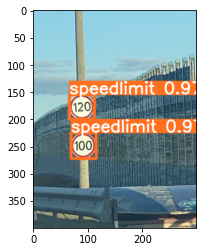

In [ ]:
detections_dir = "/content/yolov5/runs/detect/yolo_road_det6/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [ ]:
%cd /content

/content


In [ ]:
!ls

yolo_road_det
